<a href="https://colab.research.google.com/github/ddesai-sjsu/linux/blob/master/Restaurant_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Review 
Recommendation Engine

**Data Narrative:**

Each record in the dataset contains the review text, the review title, the star   rating, an anonymized reviewer ID, an anonymized product ID and the  coarse-grained product category (e.g. ‘books’, ‘appliances’, etc.) 


reviewer_id - ID of the reviewer

product_id - ID of the product

review_body - text of the review

stars - rating of the product


review_title - summary of the review

product_category - category of product

We have used product_id,reviewerID and product_id fields to provide product recommendations for the user based on the rating of the reviewer of a product.

We tried 2 recommendation techniques :

1-	Item Based Collaberative filtering (Item-Item recommedation)

2-	Model-based collaborative filtering system




## Installing required libraries

In [ ]:
!pip install surprise

## Importing required libraries

In [1]:
import pandas as pd
from surprise import *
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split
import pickle
from matplotlib import pyplot as plt
import seaborn as sns


## Preprocessing Data

In [2]:
df=pd.read_csv('/content/my_file.csv')
df

,Unnamed: 0,user_id,business_id,review_stars
0,0,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4
1,1,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4
2,2,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5
3,3,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2
4,4,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4
...,...,...,...,...
1699995,1699995,DCqK3QO1HiO_HMMAjGQWXg,gFwIUy6xBvG1M0VTfgZZFw,5
1699996,1699996,eQhK6dajPnWo4eQj6-Oy4g,Ag89Kt5lObftTZG7yPCMsQ,4
1699997,1699997,ae5PRyJfV6wJ8tD1IsR8fA,xLEyXF9LCaoUxi_MgW3Nrw,1
1699998,1699998,3bJ2zyYx2HbpxvedNmp8Gw,lFt7w7weA2pwp45Ulvaevg,1


In [3]:
df=df[['user_id','business_id','review_stars']]
df.columns=['user_id','business_id','stars']

**Data Visualization**

Checking the distribution of rating:


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


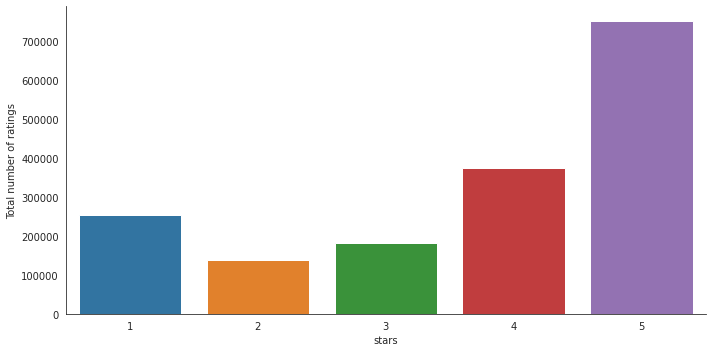

In [4]:

with sns.axes_style('white'):
    g = sns.factorplot("stars", data=df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

Finding most popular products

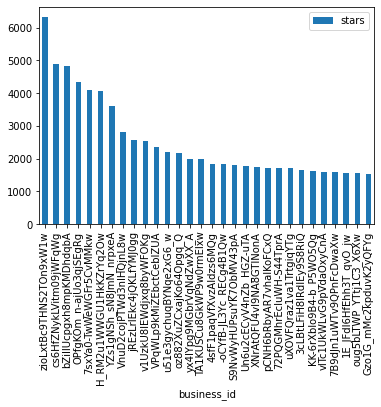

In [ ]:
new_df=df.groupby("business_id").filter(lambda x:x['stars'].count() >=2)
popular_products = pd.DataFrame(new_df.groupby('business_id')['stars'].count())
most_popular = popular_products.sort_values('stars', ascending=False)
most_popular.head(30).plot(kind = "bar")


In [ ]:
df

,user_id,business_id,stars
0,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4
1,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4
2,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5
3,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2
4,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4
...,...,...,...
1699995,DCqK3QO1HiO_HMMAjGQWXg,gFwIUy6xBvG1M0VTfgZZFw,5
1699996,eQhK6dajPnWo4eQj6-Oy4g,Ag89Kt5lObftTZG7yPCMsQ,4
1699997,ae5PRyJfV6wJ8tD1IsR8fA,xLEyXF9LCaoUxi_MgW3Nrw,1
1699998,3bJ2zyYx2HbpxvedNmp8Gw,lFt7w7weA2pwp45Ulvaevg,1


In [5]:
df_new=df[['user_id','business_id','stars']]

In [6]:
df_new.columns=['userID','itemID','rating']

## Converting Data to data type that surprise module can consume

In [7]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_new,reader)

In [8]:
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

In [9]:
trainset

In [10]:
acuuracy_table={}

# training the model on multiple types


1.  'BaselineOnly'
2.  'CoClustering'
3.  'KNNBaseline'
4.  'KNNBasic'
5.  'KNNWithMeans'
6.  'KNNWithZScore'
7.  'NMF': 
8.  'NormalPredictor': 
9.  'SVD':
10. 'SVDpp': 
11. 'SlopeOne':

In [ ]:
# algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
# algo.fit(trainset)
# test_pred = algo.test(testset)
# accuracy_model=round(float(str(accuracy.rmse(test_pred, verbose=True))[0:]),4)
# acuuracy_table['KNNWithMeans']=accuracy_model

Estimating biases using als...
Computing the pearson_baseline similarity matrix...


In [11]:
algo = NormalPredictor( )
algo.fit(trainset)
test_pred = algo.test(testset)
accuracy_model=round(float(str(accuracy.rmse(test_pred, verbose=True))[0:]),4)
accuracy_model
acuuracy_table['NormalPredictor']=accuracy_model

RMSE: 1.8876


In [12]:
algo = BaselineOnly()
algo.fit(trainset)
test_pred = algo.test(testset)
accuracy_model=round(float(str(accuracy.rmse(test_pred, verbose=True))[0:]),4)
accuracy_model
acuuracy_table['BaselineOnly']=accuracy_model

Estimating biases using als...
RMSE: 1.2989


In [ ]:
# algo = KNNBasic()
# algo.fit(trainset)
# test_pred = algo.test(testset)
# accuracy_model=round(float(str(accuracy.rmse(test_pred, verbose=True))[0:]),4)
# accuracy_model
# acuuracy_table['KNNBasic']=accuracy_model

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2390


In [ ]:
algo = KNNWithZScore()
algo.fit(trainset)
test_pred = algo.test(testset)
accuracy_model=round(float(str(accuracy.rmse(test_pred, verbose=True))[0:]),4)
accuracy_model
acuuracy_table['KNNWithZScore']=accuracy_model

Computing the msd similarity matrix...


In [ ]:
algo = KNNBaseline()
algo.fit(trainset)
test_pred = algo.test(testset)
accuracy_model=round(float(str(accuracy.rmse(test_pred, verbose=True))[0:]),4)
accuracy_model
acuuracy_table['KNNBaseline']=accuracy_model

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2193


In [ ]:
algo = SVD()
algo.fit(trainset)
test_pred = algo.test(testset)
accuracy_model=round(float(str(accuracy.rmse(test_pred, verbose=True))[0:]),4)
accuracy_model
acuuracy_table['SVD']=accuracy_model

RMSE: 1.2205


In [ ]:
algo =SVDpp()
algo.fit(trainset)
test_pred = algo.test(testset)
accuracy_model=round(float(str(accuracy.rmse(test_pred, verbose=True))[0:]),4)
accuracy_model
acuuracy_table['SVDpp']=accuracy_model

RMSE: 1.2178


In [ ]:
pickle.dump(algo, open('SVDpp.pkl','wb'))


In [ ]:
algo =NMF()
algo.fit(trainset)
test_pred = algo.test(testset)
accuracy_model=round(float(str(accuracy.rmse(test_pred, verbose=True))[0:]),4)
accuracy_model
acuuracy_table['NMF']=accuracy_model

RMSE: 1.3366


In [ ]:
algo =SlopeOne()
algo.fit(trainset)
test_pred = algo.test(testset)
accuracy_model=round(float(str(accuracy.rmse(test_pred, verbose=True))[0:]),4)
accuracy_model
acuuracy_table['SlopeOne']=accuracy_model

RMSE: 1.3152


In [ ]:
algo =CoClustering()
algo.fit(trainset)
test_pred = algo.test(testset)
accuracy_model=round(float(str(accuracy.rmse(test_pred, verbose=True))[0:]),4)
accuracy_model
acuuracy_table['CoClustering']=accuracy_model

RMSE: 1.3452


In [ ]:
df_new

,userID,itemID,rating
0,rLtl8ZkDX5vH5nAx9C3q5Q,9yKzy9PApeiPPOUJEtnvkg,5
1,0a2KyEL0d3Yb1V6aivbIuQ,ZRJwVLyzEJq1VAihDhYiow,5
2,0hT2KtfLiobPvh6cDC8JQg,6oRAC4uyJCsJl1X0WZpVSA,4
3,uZetl9T0NcROGOyFfughhg,_1QQZuf4zZOyFCvXc0o6Vg,5
4,vYmM4KTsC8ZfQBg-j5MWkw,6ozycU1RpktNG2-1BroVtw,5
...,...,...,...
9995,_eqQoPtQ3e3UxLE4faT6ow,VY_tvNUCCXGXQeSvJl757Q,3
9996,ROru4uk5SaYc3rg8IU7SQw,EKzMHI1tip8rC1-ZAy64yg,4
9997,gGbN1aKQHMgfQZkqlsuwzg,53YGfwmbW73JhFiemNeyzQ,4
9998,0lyVoNazXa20WzUyZPLaQQ,9SKdOoDHcFoxK5ZtsgHJoA,2


In [ ]:
algo.predict(uid='rLtl8ZkDX5vH5nAx9C3q5Q',iid='9yKzy9PApeiPPOUJEtnvkg').est

2.822412220389786

## Comparing all the model performance

In [ ]:
acuuracy_table

{'BaselineOnly': 1.3999,
 'CoClustering': 1.4001,
 'KNNBaseline': 1.3999,
 'KNNBasic': 1.4001,
 'KNNWithMeans': 1.4001,
 'KNNWithZScore': 1.4001,
 'NMF': 1.4001,
 'NormalPredictor': 1.8597,
 'SVD': 1.3999,
 'SVDpp': 1.3998,
 'SlopeOne': 1.4001}

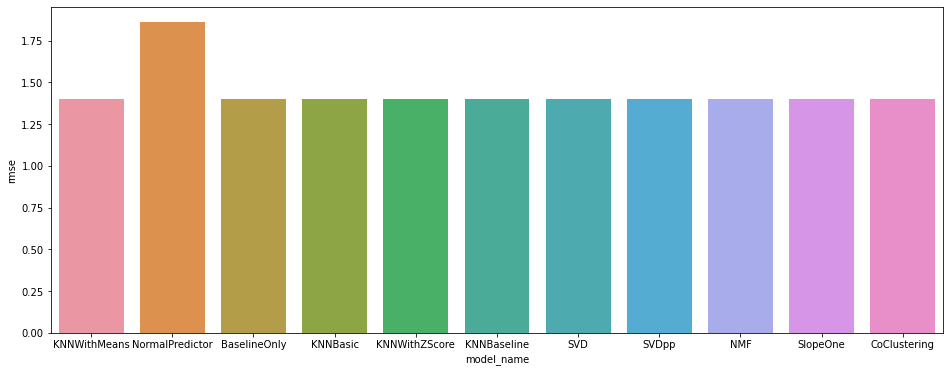

In [ ]:

accuracy_x=pd.DataFrame.from_dict(acuuracy_table,orient='index').reset_index()
accuracy_x.columns=['model_name','rmse']

plt.figure(figsize=(16, 6))
ax = sns.barplot(data=accuracy_x, x='model_name', y='rmse')


We can observe that all the models perfomened in a similar way except Normal Predictor. It has a highest rmse others are almost in the similar rmse score

## Creating a function to use Models and then recommend  products

In this function we will be getting user id and scan through all the products and return top products that the user might like based on item based collorative filtering.

in this approach the liking of user will be kept into consideration as the model is based on user ratings

In [ ]:
algo = pickle.load(open('/content/SVDpp.pkl','rb'))

In [ ]:
import heapq
def get_possible_rating(uid,recommend_number=5):
  product={}
  for i in df.product_id:
    product[i]=algo.predict(uid=uid,iid=i).est

  return heapq.nlargest(recommend_number, product.keys(), product.get) 

In [ ]:
get_possible_rating('reviewer_en_0742686',12)

['product_en_0026780',
 'product_en_0424139',
 'product_en_0391030',
 'product_en_0409278',
 'product_en_0487124',
 'product_en_0947386',
 'product_en_0173162',
 'product_en_0156087',
 'product_en_0360988',
 'product_en_0906874',
 'product_en_0465743',
 'product_en_0138723']

In [ ]:
df

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
60124,en_0198486,product_en_0707560,reviewer_en_0236472,2,"I like the looks of the clock. Unfortunately, ...",The Clock stopped,en,home
76664,en_0132853,product_en_0184281,reviewer_en_0109546,2,2 of the 3 ordered came bent to fit inside a t...,Two Stars,en,lawn_and_garden
91626,en_0063768,product_en_0731178,reviewer_en_0297330,3,I found the black nail parts to fall off easil...,Black Nails fall off,en,lawn_and_garden
155329,en_0716544,product_en_0419634,reviewer_en_0920268,4,Good for the price point,For yard projects,en,lawn_and_garden
149826,en_0388580,product_en_0407902,reviewer_en_0358996,4,We ordered the pineapple design and it's a nic...,"Nice, but thin",en,home
...,...,...,...,...,...,...,...,...
11117,en_0809394,product_en_0142219,reviewer_en_0703036,1,The order came broken What do I do now?,The order came broken,en,wireless
185655,en_0292687,product_en_0197184,reviewer_en_0928340,5,In a world of post it’s sometimes you just nee...,Exactly as Advertised,en,office_product
114207,en_0208905,product_en_0736451,reviewer_en_0884313,3,Keeps breaking while printing I've used other ...,Filiment was brittle right from the packaging,en,industrial_supplies
183903,en_0484662,product_en_0385392,reviewer_en_0061305,5,Although activated charcoal has become a popul...,A noticable difference from the first use!,en,beauty


In [ ]:
import random
ix=random.randrange(0, len(df))
i=df_new['itemID'].values[ix]
get_possible_rating(i,12)

['product_en_0026780',
 'product_en_0424139',
 'product_en_0391030',
 'product_en_0409278',
 'product_en_0487124',
 'product_en_0947386',
 'product_en_0173162',
 'product_en_0156087',
 'product_en_0360988',
 'product_en_0906874',
 'product_en_0465743',
 'product_en_0138723']

In [ ]:
df

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
60124,en_0198486,product_en_0707560,reviewer_en_0236472,2,"I like the looks of the clock. Unfortunately, ...",The Clock stopped,en,home
76664,en_0132853,product_en_0184281,reviewer_en_0109546,2,2 of the 3 ordered came bent to fit inside a t...,Two Stars,en,lawn_and_garden
91626,en_0063768,product_en_0731178,reviewer_en_0297330,3,I found the black nail parts to fall off easil...,Black Nails fall off,en,lawn_and_garden
155329,en_0716544,product_en_0419634,reviewer_en_0920268,4,Good for the price point,For yard projects,en,lawn_and_garden
149826,en_0388580,product_en_0407902,reviewer_en_0358996,4,We ordered the pineapple design and it's a nic...,"Nice, but thin",en,home
...,...,...,...,...,...,...,...,...
11117,en_0809394,product_en_0142219,reviewer_en_0703036,1,The order came broken What do I do now?,The order came broken,en,wireless
185655,en_0292687,product_en_0197184,reviewer_en_0928340,5,In a world of post it’s sometimes you just nee...,Exactly as Advertised,en,office_product
114207,en_0208905,product_en_0736451,reviewer_en_0884313,3,Keeps breaking while printing I've used other ...,Filiment was brittle right from the packaging,en,industrial_supplies
183903,en_0484662,product_en_0385392,reviewer_en_0061305,5,Although activated charcoal has become a popul...,A noticable difference from the first use!,en,beauty


In [ ]:
df=df_new

df

,userID,itemID,rating
60124,reviewer_en_0236472,product_en_0707560,2
76664,reviewer_en_0109546,product_en_0184281,2
91626,reviewer_en_0297330,product_en_0731178,3
155329,reviewer_en_0920268,product_en_0419634,4
149826,reviewer_en_0358996,product_en_0407902,4
...,...,...,...
11117,reviewer_en_0703036,product_en_0142219,1
185655,reviewer_en_0928340,product_en_0197184,5
114207,reviewer_en_0884313,product_en_0736451,3
183903,reviewer_en_0061305,product_en_0385392,5


## Model Based Collobartive filtering


Preprocessing for model based collaborative filtering.


In [ ]:
df

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0


In [ ]:
df_new

,userID,itemID,rating
0,rLtl8ZkDX5vH5nAx9C3q5Q,9yKzy9PApeiPPOUJEtnvkg,5
1,0a2KyEL0d3Yb1V6aivbIuQ,ZRJwVLyzEJq1VAihDhYiow,5
2,0hT2KtfLiobPvh6cDC8JQg,6oRAC4uyJCsJl1X0WZpVSA,4
3,uZetl9T0NcROGOyFfughhg,_1QQZuf4zZOyFCvXc0o6Vg,5
4,vYmM4KTsC8ZfQBg-j5MWkw,6ozycU1RpktNG2-1BroVtw,5
...,...,...,...
9995,_eqQoPtQ3e3UxLE4faT6ow,VY_tvNUCCXGXQeSvJl757Q,3
9996,ROru4uk5SaYc3rg8IU7SQw,EKzMHI1tip8rC1-ZAy64yg,4
9997,gGbN1aKQHMgfQZkqlsuwzg,53YGfwmbW73JhFiemNeyzQ,4
9998,0lyVoNazXa20WzUyZPLaQQ,9SKdOoDHcFoxK5ZtsgHJoA,2


In [ ]:
ratings_matrix = df_new.pivot_table(values='rating', index='userID', columns='itemID', fill_value=0)


In [ ]:
X = ratings_matrix.T

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X.to_csv('X.csv')

In [ ]:
X1 = X

In [ ]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(4174, 10)

In [ ]:
import numpy as np
correlation_matrix = np.corrcoef(decomposed_matrix)

In [ ]:
np.save('outfile', correlation_matrix)


In [ ]:
import random
ix=random.randrange(0, len(df))


In [ ]:
i

'_tkAI5Q5XQSfgbqJzDKSDQ'

In [ ]:
def recommend_restaurants(i,n=5):
  correlation_matrix=np.load('/content/outfile.npy')
  X=pd.read_csv('X.csv', index_col=0)
  product_names = list(X.index)
  product_ID = product_names.index(i)
  correlation_product_ID = correlation_matrix[product_ID]
  Recommend = list(X.index[correlation_product_ID > 0.65])

  # Removes the item already bought by the customer
  Recommend.remove(i) 
  return Recommend[0:n]

In [ ]:
recommend_restaurants('-0QBrNvhrPQCaeo7mTo0zQ',n=5)

['-A5CFmkgdMEggaihtyxX4Q',
 '-b_VjHZmA7-8LVWp6z36VA',
 '-sC66z4SO3tR7nFCjfQwuQ',
 '0K634ehk41ZRc4kj3NTAEQ',
 '1-1VcGTL3GyCqUpXZLFTZA']